Quick examples to turn analytical nonspinning quasicircular model with pyrex

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyrex.core import *

/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


First define a function that cuts pyrex waveform at tcutoff, such that the waveforms do not have long inspiral.

In [2]:
def sanitize_pyrex_wave(cook, start_time):
    sel = cook.time > start_time
    cook.h22 = cook.h22[sel]#.conjugate()
    cook.time = cook.time[sel]
    return cook

Define the parameters and tcutoff before merger you want to generate the waveforms

In [5]:
tcutoff=-0.5
std_phenom = {'mass1':30.,'mass2':20.,'eccentricity':0.2,'approximant':'IMRPhenomD','spin1x':0,'spin1y':0,'spin1z':0,'spin2x':0,'spin2y':0,'spin2z':0,'inclination':0,'distance':100.,'coa_phase':0, 'x':0.12}
std_seob = {'mass1':30.,'mass2':20.,'eccentricity':0.2,'approximant':'SEOBNRv4','spin1x':0,'spin1y':0,'spin1z':0,'spin2x':0,'spin2y':0,'spin2z':0,'inclination':0,'distance':100.,'coa_phase':0, 'x':0.12}
std_phenom_circ = {'mass1':30.,'mass2':20.,'eccentricity':0,'approximant':'IMRPhenomD','spin1x':0,'spin1y':0,'spin1z':0,'spin2x':0,'spin2y':0,'spin2z':0,'inclination':0,'distance':100.,'coa_phase':0, 'x':0.12}
std_seob_circ = {'mass1':30.,'mass2':20.,'eccentricity':0,'approximant':'SEOBNRv4','spin1x':0,'spin1y':0,'spin1z':0,'spin2x':0,'spin2y':0,'spin2z':0,'inclination':0,'distance':100.,'coa_phase':0, 'x':0.12}

Generate the waveforms with the parameters and cut them at t=-0.5 before merger

In [6]:
phen_ecc = Cookware(**std_phenom)
seob_ecc = Cookware(**std_seob)
phen_circ = Cookware(**std_phenom_circ)
seob_circ = Cookware(**std_seob_circ)
sanitize_pyrex_wave(phen_ecc, tcutoff)
sanitize_pyrex_wave(seob_ecc, tcutoff)
sanitize_pyrex_wave(phen_circ, tcutoff)
sanitize_pyrex_wave(seob_circ, tcutoff)

# PhenomD+ecc

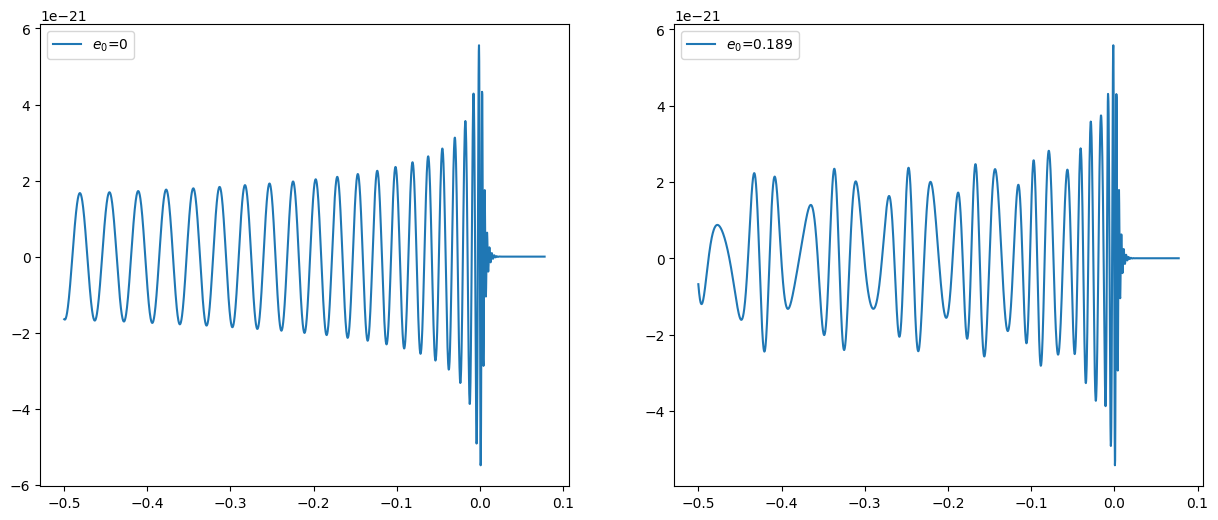

In [12]:
#Plot pyrex waveform from PhenomD with different desired eccentricities
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(phen_circ.time,phen_circ.h22,label=r'$e_0$=0')
plt.legend()
plt.subplot(122)
plt.plot(phen_ecc.time,phen_ecc.h22,label=r'$e_0$=0.189')
plt.legend()

# SEOBNRv4+ecc

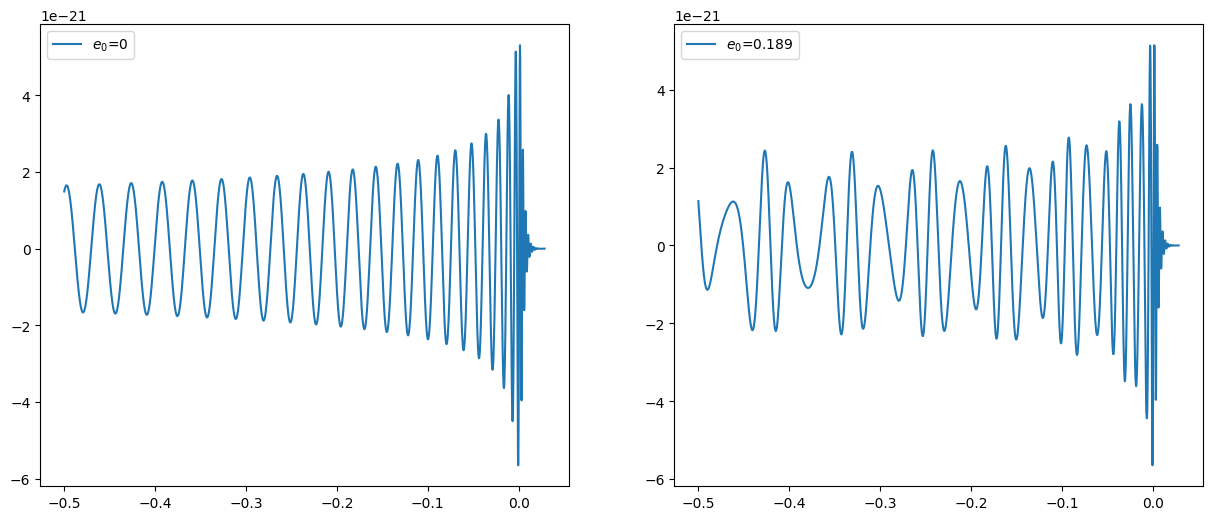

In [13]:
#Plot pyrex waveform from SEOBNRv4 with different desired eccentricities
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(seob_circ.time,seob_circ.h22,label=r'$e_0$=0')
plt.legend()
plt.subplot(122)
plt.plot(seob_ecc.time,seob_ecc.h22,label=r'$e_0$=0.189')
plt.legend()